**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [3]:
import pandas as pd

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("social_network_ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
dataset.shape

(400, 5)

In [12]:
df = dataset.isnull().sum()
df

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [14]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [15]:
dataset.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
dataset.shape

(400, 5)

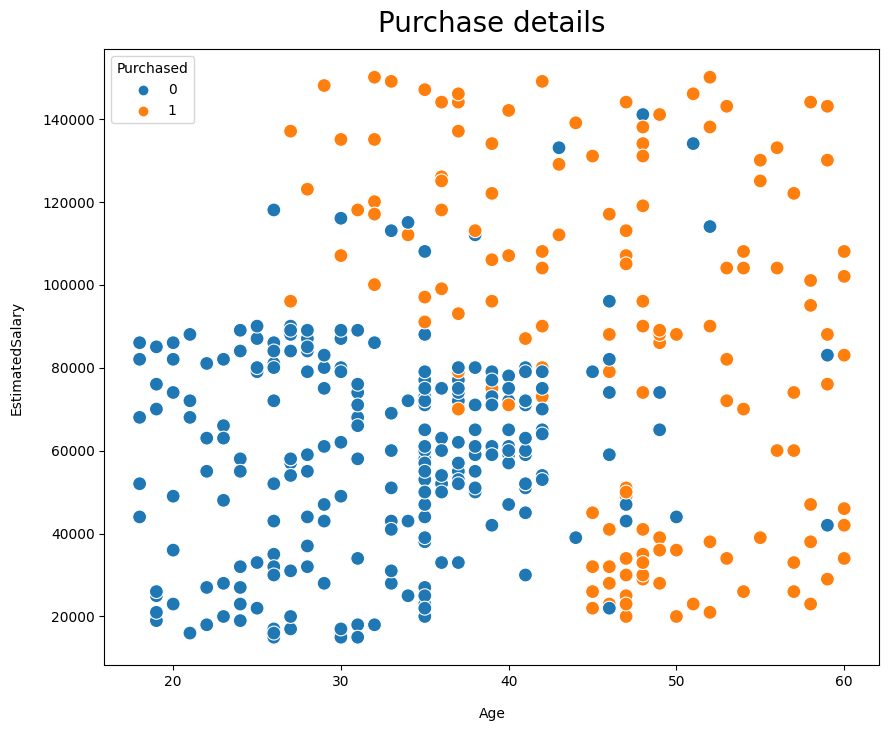

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset,s=100)
plt.title("Purchase details",y=1.015, fontsize=20)
plt.xlabel("Age",labelpad=13)
plt.ylabel("EstimatedSalary", labelpad = 13)
ax=plt.gca()

In [6]:
from sklearn.model_selection import train_test_split
x=dataset[['Age','EstimatedSalary']].values
y=dataset['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled  =  scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled  =  scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

In [16]:
logistic_regression.coef_

array([[-2.23102744e-09, -2.07854462e-06]])

In [13]:
logistic_regression.intercept_

array([-2.12654828e-10])

In [14]:
logistic_regression.predict([[20,30000]])

array([0], dtype=int64)

In [15]:

logistic_regression.predict_proba([[20,30000]])

array([[0.51558405, 0.48441595]])

In [17]:
logistic_regression.predict_proba(X_test)

array([[0.54508557, 0.45491443],
       [0.52595847, 0.47404153],
       [0.538894  , 0.461106  ],
       [0.54095928, 0.45904072],
       [0.52595847, 0.47404153],
       [0.51039124, 0.48960876],
       [0.50779393, 0.49220607],
       [0.57427396, 0.42572604],
       [0.53527656, 0.46472344],
       [0.52232952, 0.47767048],
       [0.5254402 , 0.4745598 ],
       [0.52854892, 0.47145108],
       [0.52854892, 0.47145108],
       [0.53992681, 0.46007319],
       [0.5445701 , 0.4554299 ],
       [0.56049957, 0.43950043],
       [0.53992681, 0.46007319],
       [0.54405455, 0.45594545],
       [0.56714469, 0.43285531],
       [0.51143002, 0.48856998],
       [0.52440351, 0.47559649],
       [0.57427396, 0.42572604],
       [0.52647668, 0.47352332],
       [0.55434628, 0.44565372],
       [0.51454572, 0.48545428],
       [0.57274875, 0.42725125],
       [0.54508557, 0.45491443],
       [0.54147539, 0.45852461],
       [0.53217295, 0.46782705],
       [0.54457011, 0.45542989],
       [0.

In [19]:
from sklearn.metrics import confusion_matrix, f1_score,precision_score,recall_score,accuracy_score
cm = metrics.confusion_matrix(y_test,y_pred)
cm
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(68, 0, 32, 0)

In [20]:
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,68,0
Actual Positive,32,0


In [22]:
p=metrics.precision_score(y_test, y_pred)
r=metrics.recall_score(y_test, y_pred)
a=metrics.accuracy_score(y_test, y_pred)
f1=metrics.f1_score(y_test, y_pred)
print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)


precision_score: 0.0
recall_score: 0.0
accuracy_score: 0.68
f1_score: 0.0


C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(8.222222222222223, 0.5, 'Predicted Label')

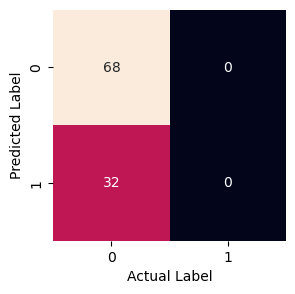

In [24]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,annot=True,cbar=False)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [25]:
err=(fn+fp)/(tn+fp+fn+tp)
err

0.32